In [1]:
import matplotlib.pyplot as plt
import cv2
import sys
import torch

sys.path.append('../../')
from shift_ocr.detectors.fast import FASTDetector
from shift_ocr.utils.BBoxVisualizer import BoundingBoxVisualizer
from shift_ocr.recognizer.crnn import CRNNRecognizer
from shift_ocr.postprocessor.simple import SimplePostprocessor
from doctr.datasets.vocabs import VOCABS
from doctr.models.recognition import CRNN, crnn_vgg16_bn, recognition_predictor
from doctr.models.preprocessor import PreProcessor
from shift_ocr.utils.ctc_decoder import MaskedCTCDecoder, VOCAB_MULTI, GROUP_IDXS

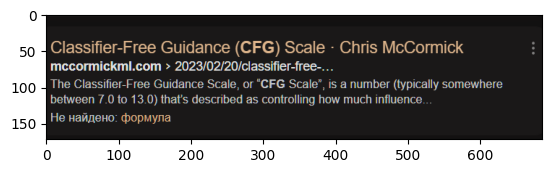

In [2]:
detector = FASTDetector(
            cuda=True,
            pretrained=True,
            assume_straight_pages=False
        )
recognizer = CRNNRecognizer(
    cuda=True,
    pretrained=True,
)
postprocessor = SimplePostprocessor()
img = cv2.imread('../detector/img.png')

plt.imshow(img)

In [3]:
model = crnn_vgg16_bn(
    pretrained=True,
    vocab=VOCAB_MULTI
)
model.postprocessor = MaskedCTCDecoder(vocab=VOCAB_MULTI, group_indices=GROUP_IDXS)
net = recognition_predictor(arch=model, batch_size=1).eval()
detections = detector.detect(img)

In [5]:
post_detections = postprocessor.postprocessing(detections, img)
res = net([post_detections[0].crop])
print(res)

[('шAшЧЁүtүHүЧИүҺжDжҺөүюҺюVИүж', 0.011316744610667229)]


In [ ]:
print(model.vocab)
# Вокаб сохраняется

ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzЁІБГДЖЗИЙЛПФЦЧШЩЪЫЬЭЮЯбгджзийлпфцчшщъыьэюяёіҒғҚқҢңҮүҰұҺһӘәӨө
